<a href="https://colab.research.google.com/github/Jakobs-Ben/pxt991-leggett/blob/main/TMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

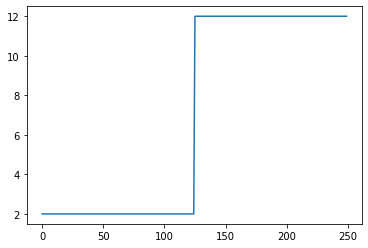

Text(0, 0.5, 'Transmission')

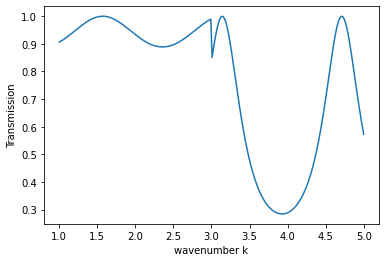

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def M_matrix(k, p, d):
  M = np.zeros((2,2), dtype=complex)
  M[0,0] = np.cos(k*d)
  M[0,1] = 1j*1/p*np.sin(k*d)
  M[1,0] = 1j*p*np.sin(k*d)
  M[1,1] = np.cos(k*d)
  return(M)

def p_TE_func(ep, theta):
  return np.sqrt(ep*8.854e-12)*np.cos(theta)

def transmission_func(M, p_f, p_l):
  nom = 2*(M[0,0]*M[1,1] - M[1,0]*M[0,1])*p_f/p_l
  den = M[0,0] + M[1,1]*p_f/p_l - M[0,1]*p_f - M[1,0]/p_l
  return nom/den


theta = 0             #incomming angle in radians
d     = 2             #slab thickness
ep    = 2             #dielectric constant of slab
p = p_TE_func(ep, theta)
p_f = p_TE_func(1, theta)
p_l = p_TE_func(1, theta)

ep = [2 for i in range(125)]
for i in range(125):
  ep.append(12)

plt.plot(ep)
plt.show()

#"""
k = np.linspace(1,5,250)               #wavenumber
transmission = []
for i in range(len(k)):
  p = p_TE_func(ep[i], theta)
  M = M_matrix(k[i], p, d)
  transmission.append(np.abs(transmission_func(M, p_f, p_l))**2)

plt.plot(k, transmission)
plt.xlabel('wavenumber k')
plt.ylabel('Transmission')
#"""
